# UNA COMPARACIÓN DE LAS REDES DE COMERCIO INTERNACIONAL DE     PETRÓLEO CRUDO DE LOS AÑOS 2012 Y 2016


## Introduccion 

En el año 2016 el precio promedio del barril de petróleo crudo, fijado por la Organización
de Países Exportadores de Petróleo (OPEP), fue de 26,5 dólares estadounidenses*,
siendo el más bajo de los últimos 15 años, esta caída “repentina” del precio del barril, que
para el año 2012 rondaba los 109.45 dólares estadounidense*, tuvo fuertes
repercusiones en las economías de países como Colombia, Venezuela y en general de
los países de la OPEP, organización que parece estar perdiendo influencia en el mercado
internacional de este producto. Para tener una visión más completa de lo que ha venido
ocurriendo en este mercado es necesario analizar las dinámicas del comercio
internacional de crudo, en este periodo de tiempo, como una red compleja o grafo, donde
los nodos o agentes sean los diferentes países que participan en este mercado y sus
conexiones (o arcos) los flujos comerciales entre ellos, ya sean importaciones o
exportaciones.
A raíz de la caída del precio del petróleo o, “posiblemente”, como su consecuencia, en el
periodo que va de los años 2012 a 2016 se pudieron haber dado algunos cambio
significativos en la estructura de las redes de comercio internacional del crudo, dichos
cambios, si ocurrieron realmente, podrían complementar la visión que se tiene sobre la
crisis de los precios del petróleo que se han venido dado desde el 2014 hasta hoy.


## Librerias necesarias

In [1]:
import pandas as pd
import networkx as nx
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

## Caraga y generacion de la base de datos a trabajar 

En las siguientes linias de comandos se cargan las bases de datos con las cuales se realizara la red, estas bases se unifican e un solo DataFrame. 

In [2]:
ORIG =pd.DataFrame(columns=['country_origin_id']) # Lista de nodos de destino
DEST =pd.DataFrame(columns=['country_destination_id']) # Lista de nodos de destino

EDGES =pd.DataFrame(columns=('country_origin_id','country_destination_id')) # Lista de aristas de la red
WEIGHT=pd.DataFrame(columns=['export_val']) # Lista de los pesos de las aristas de la red 

m=0
for j in range(127) :
    orig=pd.read_csv('2016_' + str(j)+'.csv',index_col=0)
    dest=pd.read_csv('2016_' + str(j)+'.csv',index_col=0)    
    edges=pd.read_csv('2016_' + str(j)+'.csv',index_col=0) #---> Cargar la base de datos 
    Weight= pd.read_csv('2016_' + str(j)+'.csv',index_col=0)
    
    orig=orig[['country_origin_id']]
    dest=dest[['country_destination_id']]
    edges=edges[['country_origin_id','country_destination_id']] 
    Weight= Weight[['export_val']]
    
    orig=orig.values
    dest=dest.values
    edges=edges.values
    Weight= Weight.values
    
    for i in range(len(edges)) : 
        
        ORIG.loc[i+m]=orig[i]
        DEST.loc[i+m]=dest[i]
        
        
        EDGES.loc[i+m]=edges[i]
        WEIGHT.loc[i+m]=Weight[i]/1e+10
        
    m=i+m+1
    

#print(ORIG)
#print("....")
#print(WEIGHT)


## Visualizacion del grafo
### Grafo dirigido 

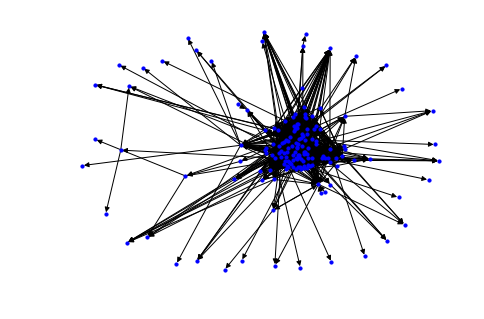

In [3]:
my_graph = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 

my_graph.add_edges_from(EDGES.values)

#nx.draw(my_graph,with_labels=True, font_weight='bold')
#nx.draw(my_graph,with_labels=True,font_size=8,node_color='blue')
nx.draw(my_graph,font_size=0.5,node_size=10,node_color='blue')

### Grafo dirigido y pesado 

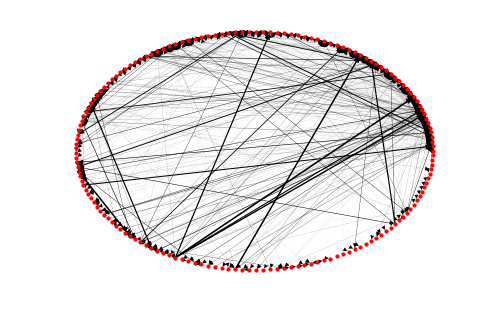

In [4]:
G = nx.DiGraph() #--->DiGrafo para hacer un grado dirigido 
 
    
G.add_edges_from(EDGES.values)
weight=WEIGHT.values #---> definimos los pesos para cada uno de los interaciones entre nodos


#nx.draw(my_graph,with_labels=True, font_weight='bold')

#nx.draw(G,width=weight,node_size=400,with_labels=True,font_size=10,node_color='white') #Grapho normal
nx.draw_circular(G,width=weight,node_size=10,font_size=10,node_color='red') # Grafo circular
#node_size=node_sizes --> tamaño de los nodos

### Mejores visualizaciones del grafo, exportando como HTML con la libreria PyVis

In [5]:
from pyvis import network as net
g=net.Network(height="750px", width="100%", bgcolor="#222222", font_color="white",notebook=True)
g.barnes_hut()
g.from_nx(G)
g.show("example.html")

## Medidas de Grafo
### Grado promedio
El grado promedio del grafo no dirigidos se puede calcular como: 
$$\bar{d}=\frac{\sum_{i=1}^g d(n_i)}{g}=\frac{2L}{g}$$

Donde $d(n_i)$ es el numero de vinvulos que tiene el nodo $i$, $g$ es el numero total de nodos de la red, y $L$ el numero tatal de aristas. 
para encontrar el numero de nodos podemos simplemente usar la funcion nx.number_of_nodes(G) que devuelve la cantidad total de nodos del grafo, y para encontrar el numero total  de aristas usamos el funcion nx.number_of_edges(G) de Networkx:

In [6]:
g=nx.number_of_nodes(G)
print('g=',g)
L=nx.number_of_edges(G)
print('L=',L)

g= 161
L= 1161


Definimos una funcion que nos permite calcular el valor del grado promedio de nuestra red, suponiendola no dirigida, como : 

In [7]:
nodos=G.nodes
def grado_promedio(G,nodos):
    d=nx.degree(G)
    g=nx.number_of_nodes(G)
    suma=0
    for i in nodos:
        suma=d[i]+suma 
    grado_promedio=suma/g
    return grado_promedio 

print(grado_promedio(G,nodos))

14.422360248447205


En esta funcion se implementa la sumatoria del numero de vinculos de cada uno de los nodos divido por el numero total de nodos. Este calculo tambien se puede hacer simplemente dividiendo el doble del numero total de aritas $L$ por el numero total de nodos $g$, para el caso del grafo no dirigido: 

In [8]:
grado_promedio=2*L/g
print(grado_promedio)

14.422360248447205


Ahora para el caso del grafo dirigido, que es del tipo que necesitamos, el vinculo existente entre dos nodos se cuenta solo una vez, con esto la expresion cambia como: 
 $$\bar{d}=\frac{L}{g} $$

In [9]:
grado_promedio=L/g
print(grado_promedio)

7.211180124223603


Este seria entonces el grado promedio de nuestra red dirigida, y quiere decir que en promedio cada pais exporta a 7 paises. pero esta informacion por ahora no parece dicir mucho.

### Distribucion de grados

Realicemos un histograma para ver el numero de vinvulos mas frecuentes en la red, en otras palabras la distribucion de grado en el grafo, para esto implementamos el siguiente algoritmo.  

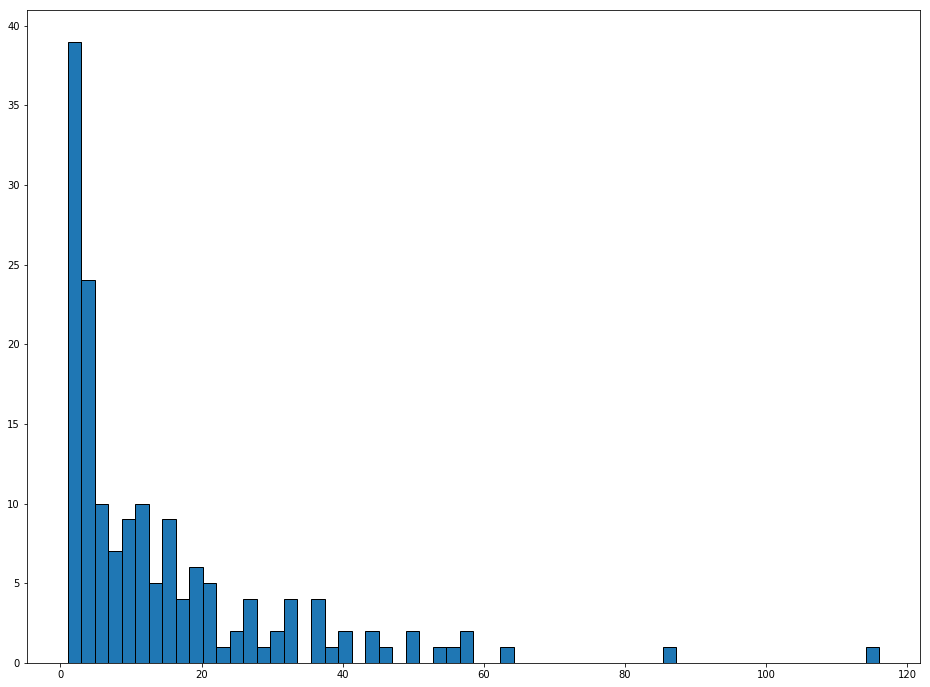

In [10]:
D=[] # un vector donde vamos a colocar el numero de vinvulos de todos los nodos
d=nx.degree(G) # Vector que contiene el par ordenado del nodo y su numero de vinculos
for i in nodos: 
    D.append(d[i])
    
# Grafica del histograma de numero vinculos(frecuencias)     
plt.figure(figsize=(16,12)) # Tamaño del grafico 
plt.hist(D, bins=60, alpha=1, edgecolor = 'black',  linewidth=1)
#plt.clf()
#plt.title('MOS')
plt.show()

Este histograma muestra que la mayoria de los nodos tiene pocas aristas, es decir que la gran mayoria de los paises tiene baja conectividad.¿seguira una ley de potencias?, el coportamiento parece ser el de una exponencial negativa, lo que nos dice que nuestro grafo es libre de escala, pero para afirmar esto primero tenemos que ver que efectivamente sigue una ley de potencias.

### Varianza de los nodos

La varianza de los nodos se calcula como:

$$s_D^2=\frac{\sum_{i=1}^g (d(n_i)- \bar{d})^2}{g} $$

esta medida que tambien se puede interpretar como la variabilidad nodal, muestra que tan diferente actuan los ajentes de la red en cuanto a sus relaciones. 

In [11]:
nodos=G.nodes
def varianza(G,nodos):
    g=nx.number_of_nodes(G)
    grado_promedio=L/g    
    d_out=G.out_degree
    suma=0
    for i in nodos:
        suma=(d_out[i]-grado_promedio)**2 +suma 
    s=suma/g
    return s 

print(varianza(G,nodos))

95.1727942594807


Este medida pude ser muy poco util en nuestro analicis, si se tiene una red libre de escala, como es el caso. 

### Densidad 

Una medida importante de un grafo es su densidad, que se define como el numero de vinculos totales sobre el numero de vinculos posibles. este ultimo se puede calcular como 

$$L_p=\frac{g(g-1)}{2} $$

Para grafos no dirigidos. Para el caso de grafos dirigidos se define como:

$$L_p=g(g-1) $$

Con esto entonces la densidad es: 

$$\rho=\frac{L}{L_p} $$

que para este grafo sera:


In [12]:
L_p=g*(g-1)
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 25760
Densidad = 0.04506987577639752


### Medidas de Centralidades. 

#### Centralidad por Numero de vinculacion. 

Se ordena de mayor a menor los paises por el numero de vinculos internacionales en este mercado, en la siguiente lista por el numero de vinculos de importacion. 

In [29]:
d_in=G.in_degree(G) #Vector con el par ordenado de numero de aristas de entrada a cada uno de los nodos
df_in=pd.DataFrame(d_in,columns=['Name', 'grado_in'])
df_in.sort_values(by='grado_in', ascending=False) # Ordena el DataFrame por valores asendentes. 

,Name,grado_in
9,NLD,86
12,USA,45
1,CHN,42
2,IND,42
27,ITA,37
7,ESP,36
6,DEU,34
24,FRA,34
21,SGP,34
18,KOR,33


En la siguiente lista se encuentran los paises ordenados por numero de vinculos de exportacion. 

In [30]:
d_out=G.out_degree(G)
df_out=pd.DataFrame(d_out, columns=['Name', 'grado_out'])
df_out.sort_values(by='grado_out', ascending=False)

,Name,grado_out
72,RUS,52
12,USA,41
13,NGA,41
125,KAZ,37
8,GBR,37
147,SAU,35
9,NLD,30
15,AZE,29
49,DZA,27
74,ARE,27


Para tener una visualizacion de que paises tienen un numero significativo de vinculos, hacemos el tamaño de nodos variables respecto al numero de vertices de salida y de entrada respectivamente. 

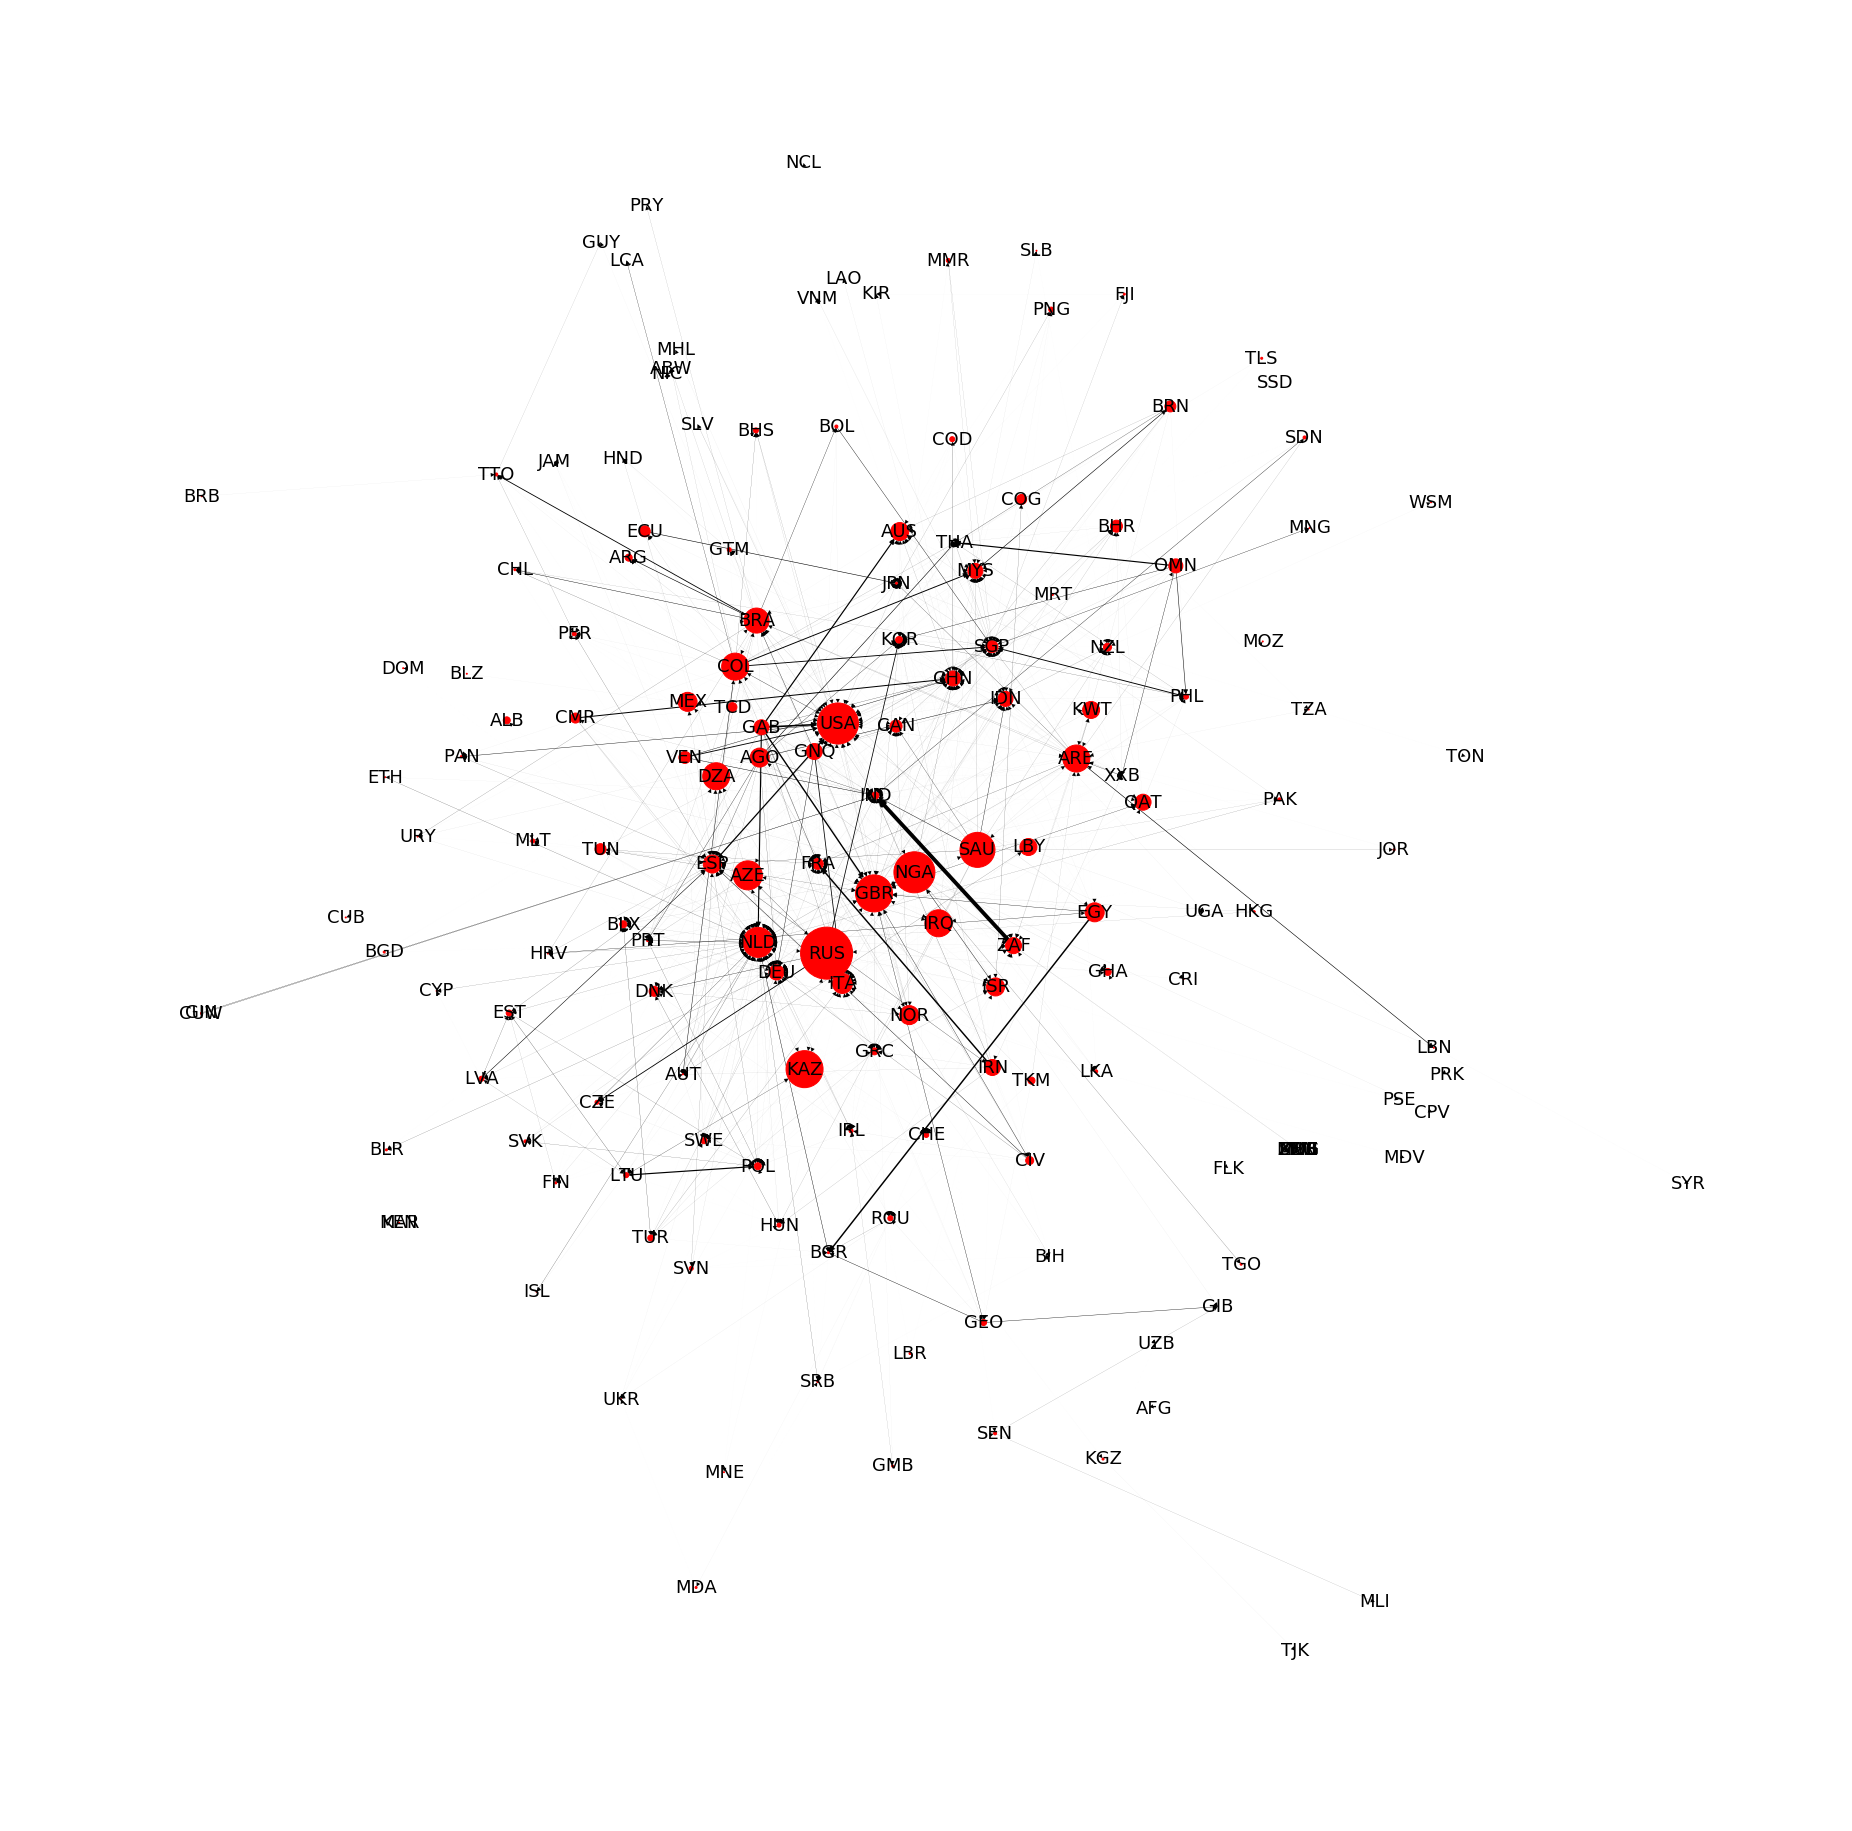

In [26]:
SIZE_OUT=[]
df_out=df_out[['grado_out']]
df_out.values
for i in df_out.values:
    SIZE_OUT.append(i*i)    
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) #define el tamaño del dibujo del grafo
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_OUT,with_labels=True) 

#nx.draw_random(G)  
#nx.draw_circular(G)  
#nx.draw_spectral(G)  
#nx.draw_spring(G)  

plt.show()

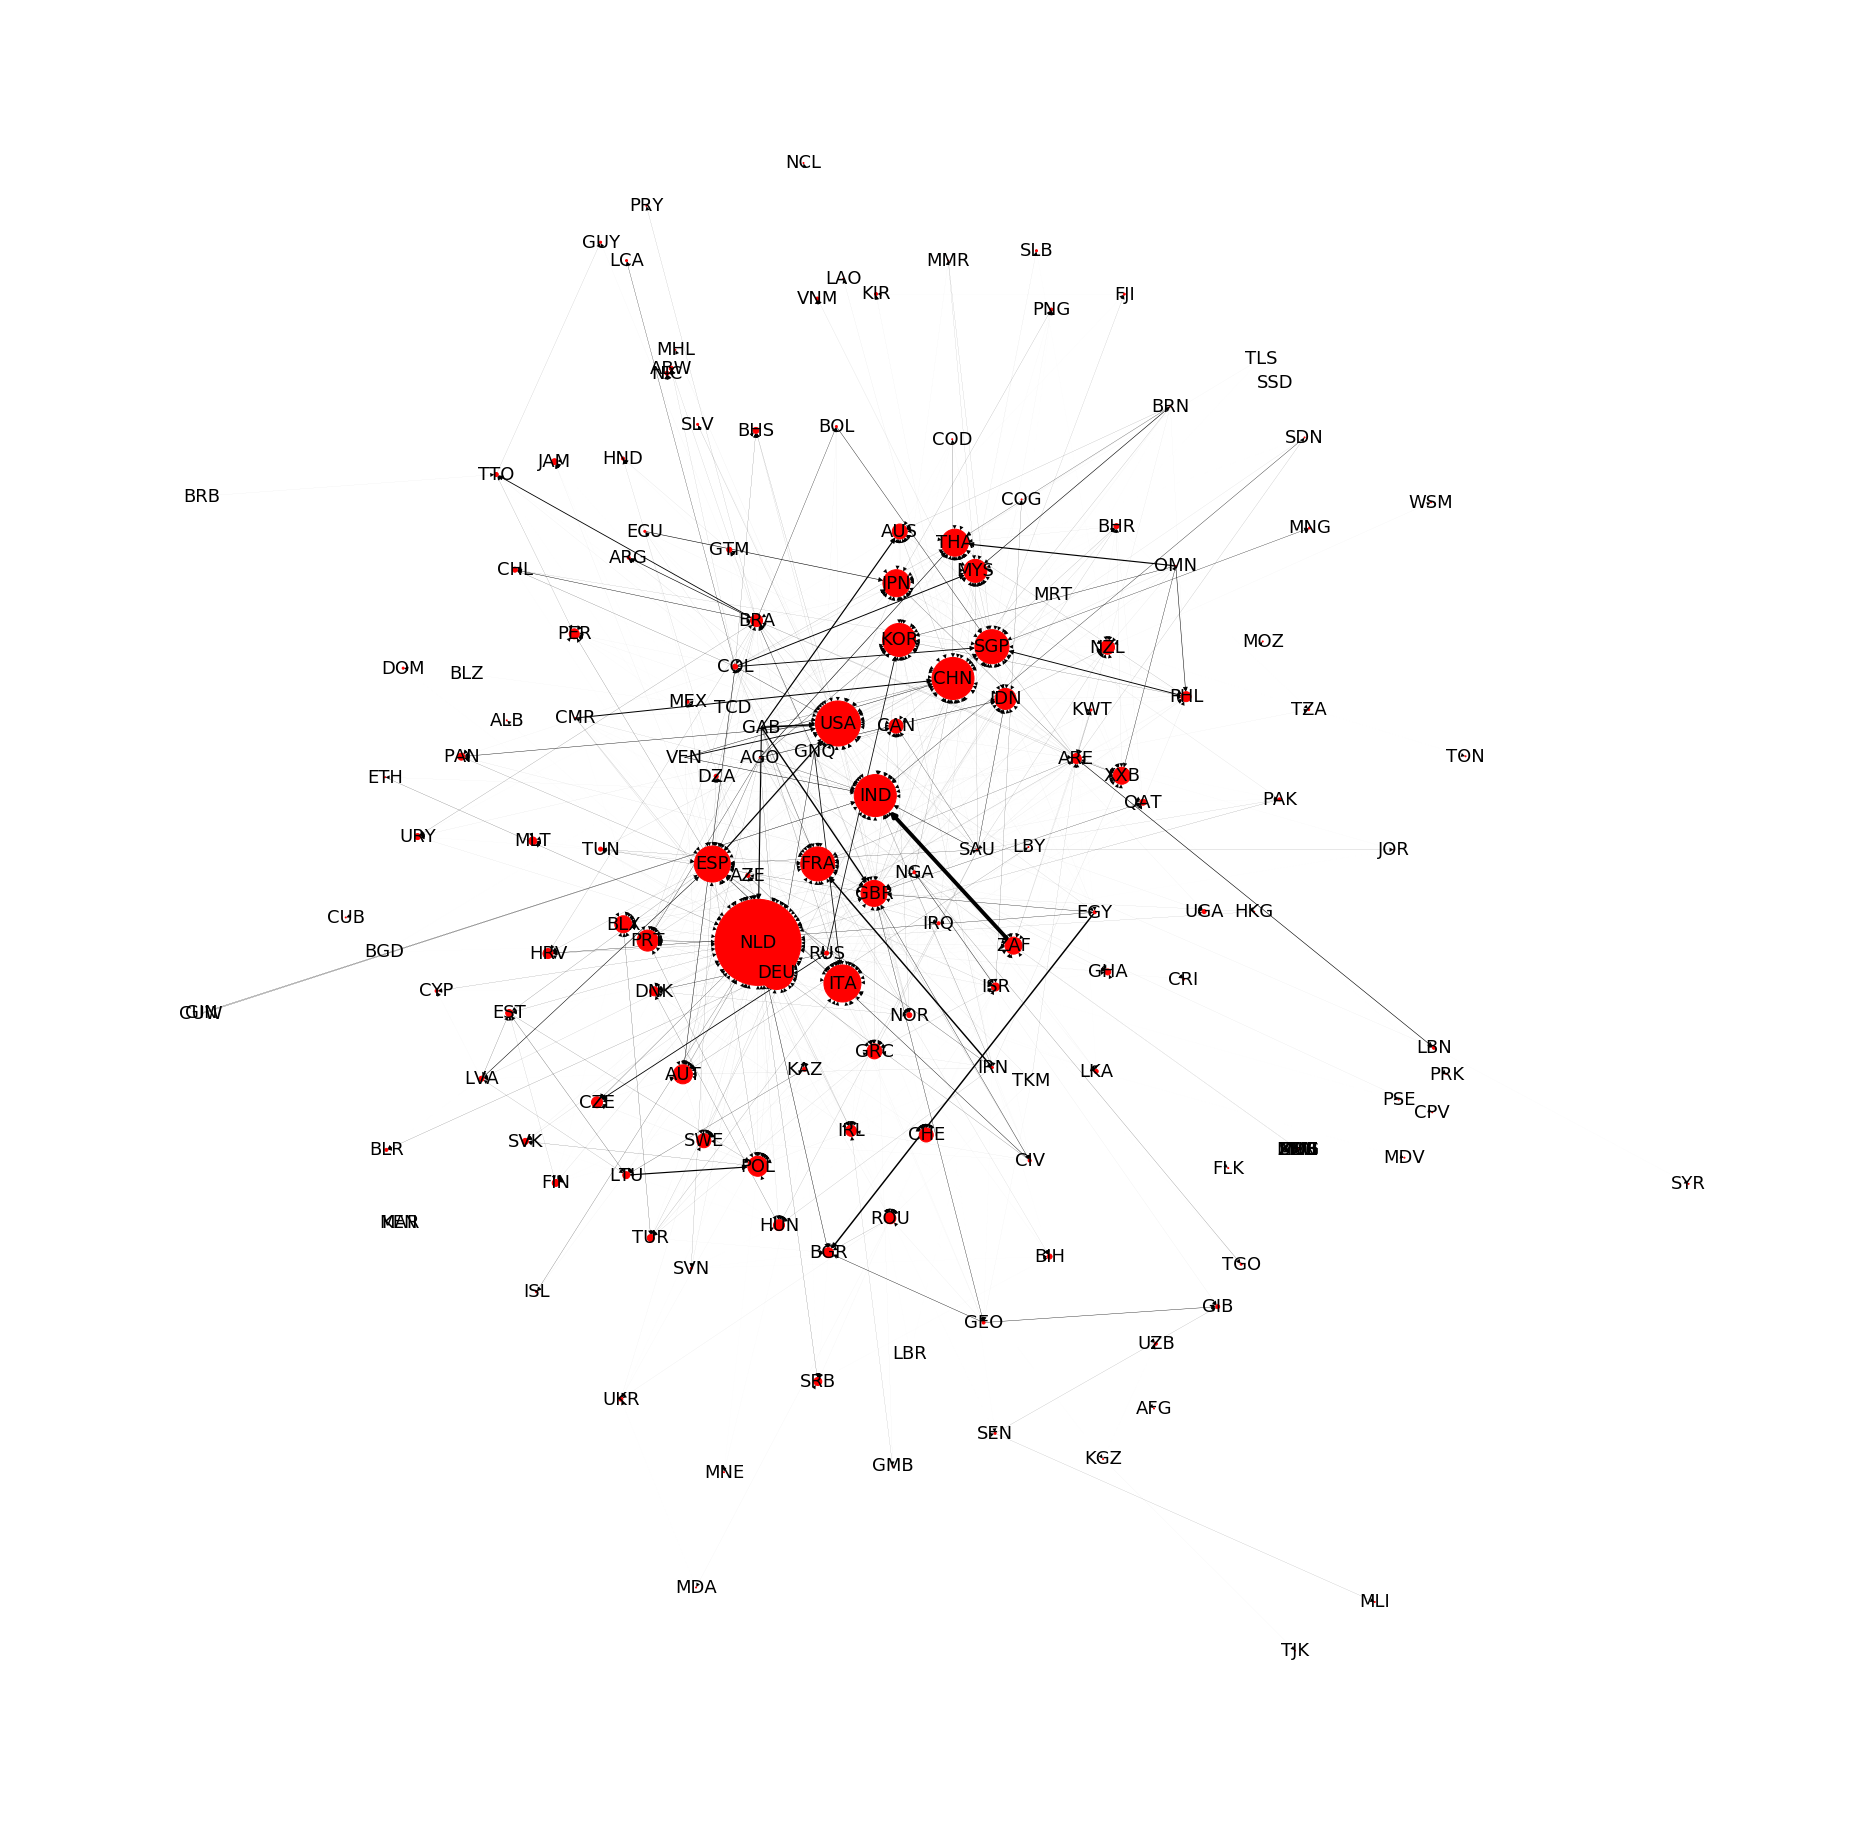

In [31]:
SIZE_IN=[]
df_in= df_in[['grado_in']]
df_in.values
for i in df_in.values:
    SIZE_IN.append(i*i)     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_IN,with_labels=True)
plt.show()

#### Centralidad por intermediacion.

In [74]:
intr=nx.betweenness_centrality(G) #dicionario en python
intr = pd.DataFrame([[key, intr[key]] for key in intr.keys()], columns=['Name', 'intermediacion'])
intr.sort_values(by='intermediacion', ascending=False)

,Name,intermediacion
9,NLD,0.271761
12,USA,0.159744
8,GBR,0.093094
14,ZAF,0.058934
21,SGP,0.041361
1,CHN,0.039992
125,KAZ,0.036596
7,ESP,0.034184
74,ARE,0.033728
27,ITA,0.032585


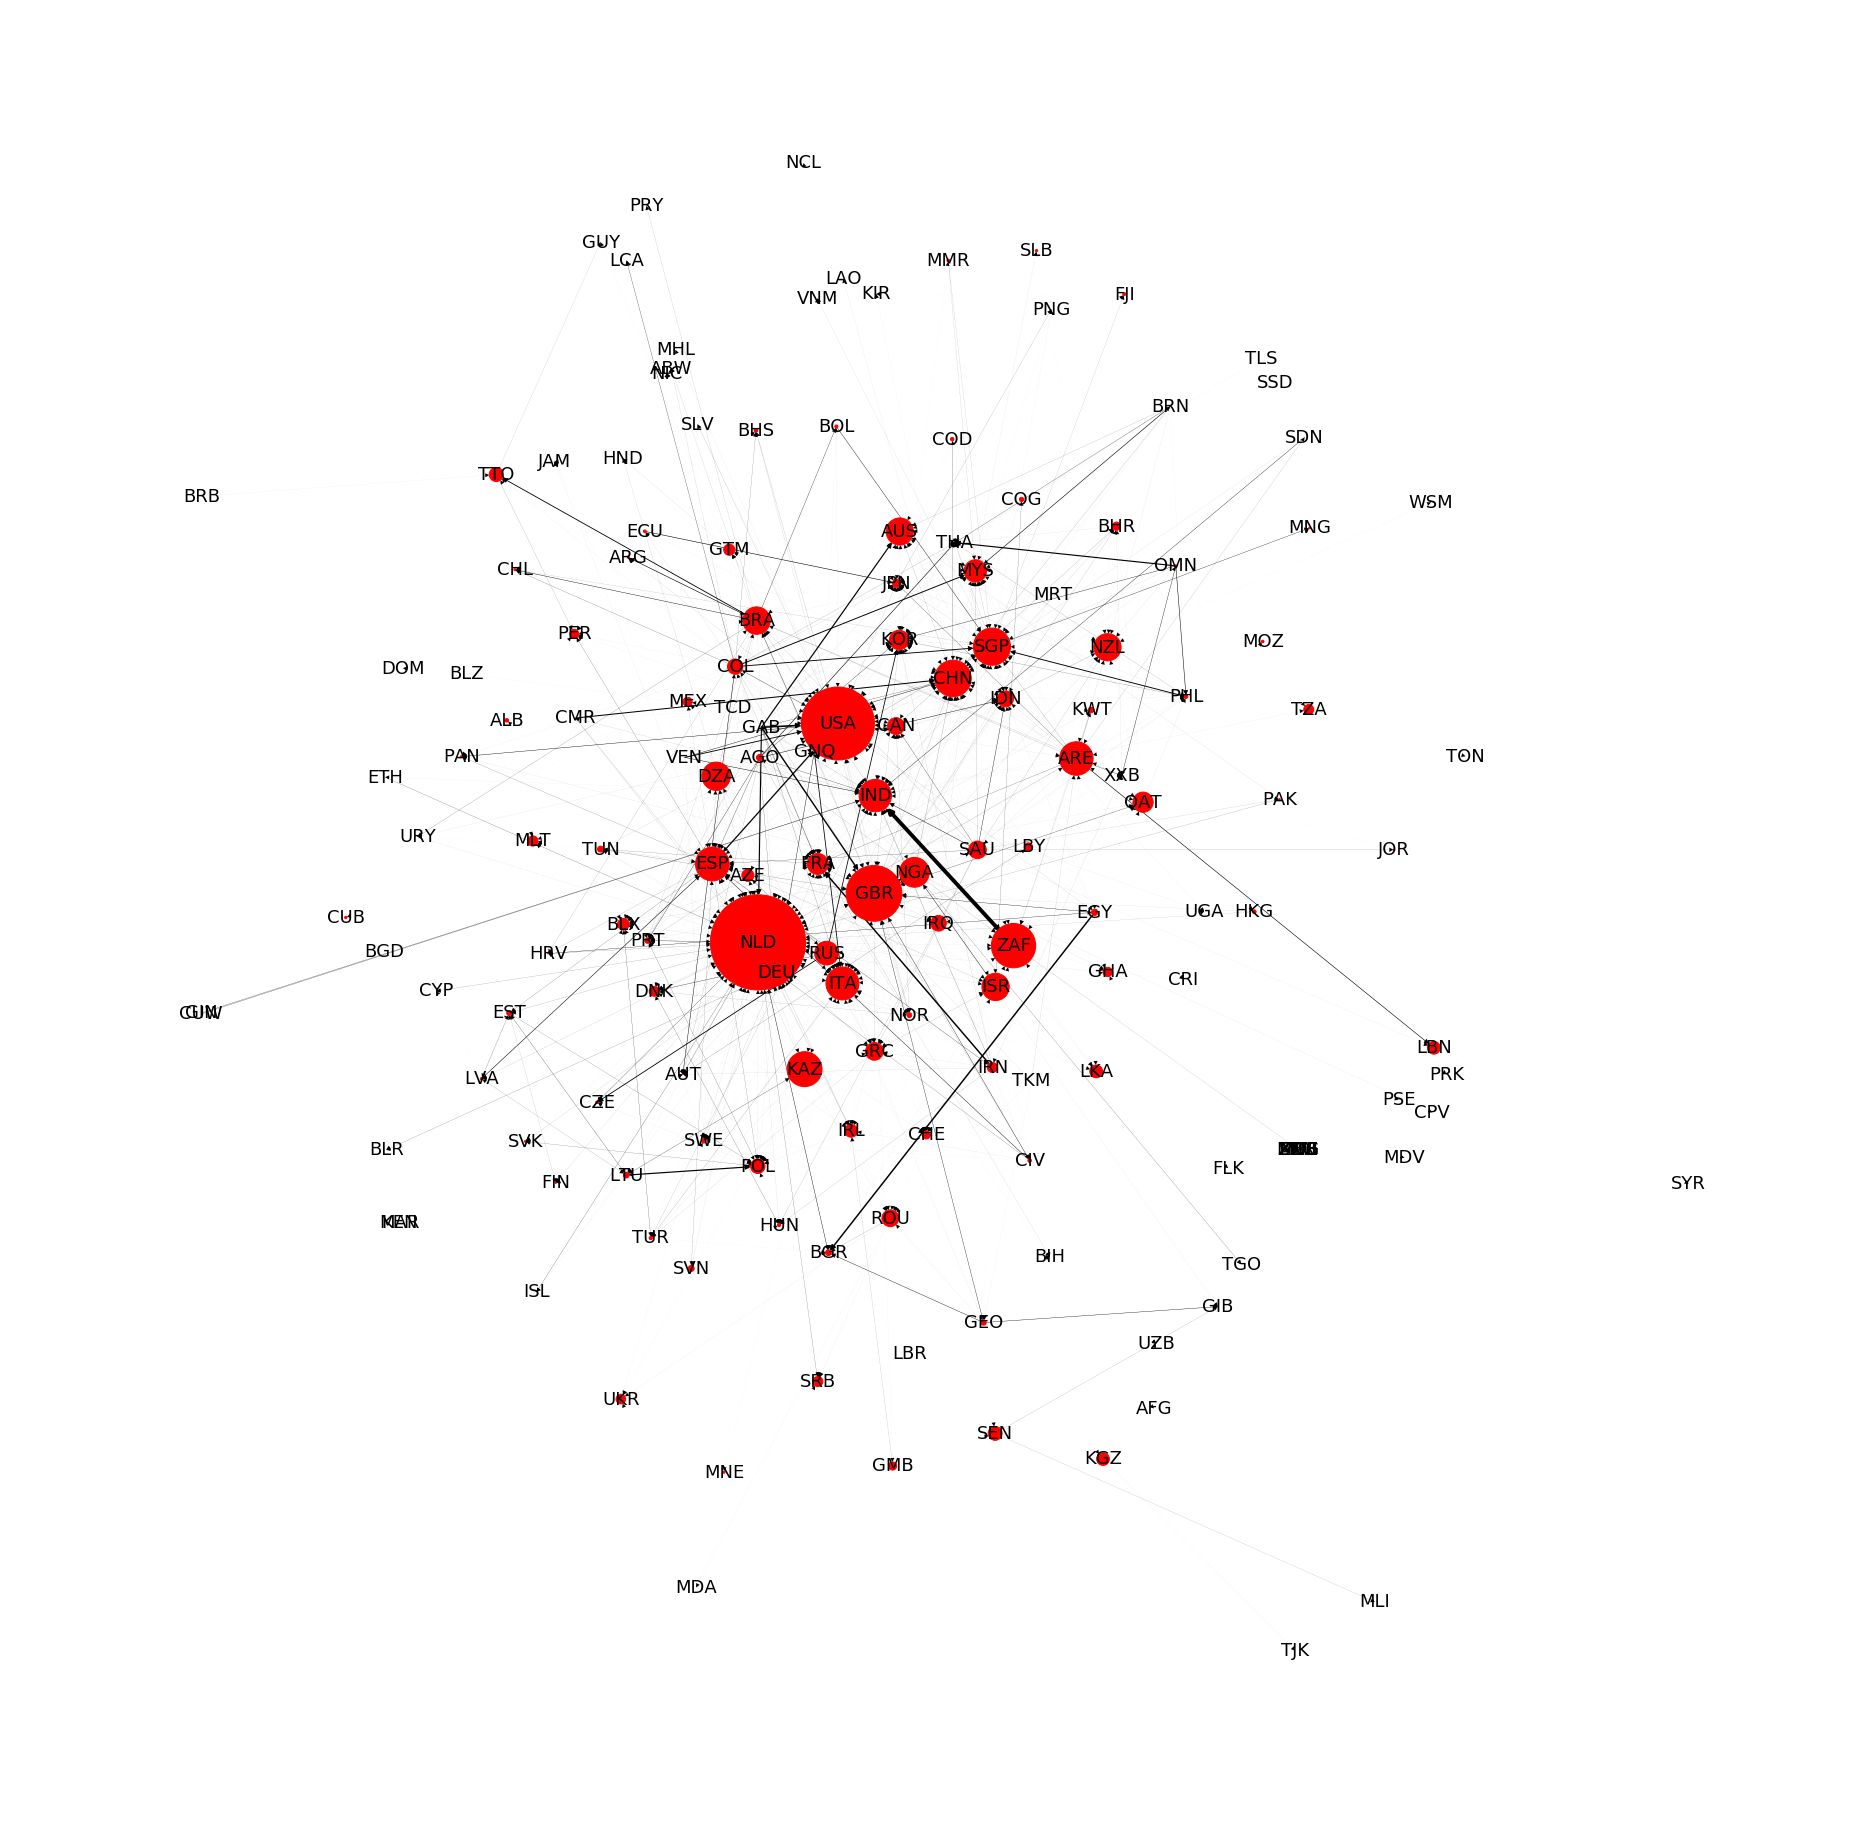

In [75]:
SIZE_INTR=[]
intr= intr[['intermediacion']]
intr.values
for i in intr.values:
    SIZE_INTR.append((i*100000/3))     
weight=WEIGHT.values 

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=18,node_color='red',node_size=SIZE_INTR,with_labels=True)
plt.show()

### N-Cliques

Un clique es un sub-grafo en el cual todos  los nodos del sub-grafo estan conectados entre si,es decir que este es un grafo completo. El N-clique es el clique de N aristas por nodo. 

El clique es un sub-grafo no dirigido y se buscara dentro de grafos no dirigidos.

N-clique mas grande de nuestra red se puede encontrar como: 

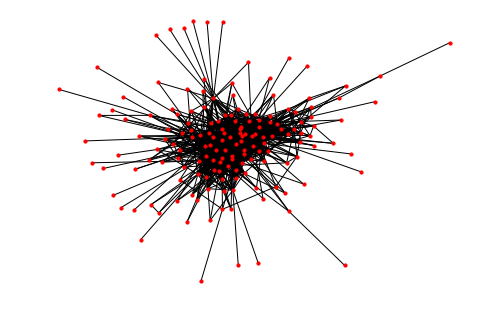

In [69]:
Gnd = nx.Graph() # grafo no dirigido 
 
    
Gnd.add_edges_from(EDGES.values)


nx.draw(Gnd,node_size=10,font_size=10,node_color='red') 



In [70]:
cliquesn = nx.nx.find_cliques(Gnd)
cliques4 = [clq for clq in cliquesn if len(clq) >= 9]
#print(cliques4)

In [71]:
nodes = set(n for clq in cliques4 for n in clq)
h = Gnd.subgraph(nodes)

['TUN', 'NLD', 'ARE', 'NOR', 'AGO', 'DZA', 'NZL', 'CAN', 'ESP', 'BLX', 'ITA', 'AZE', 'IRQ', 'SGP', 'NGA', 'JPN', 'AUS', 'COL', 'CZE', 'USA', 'SAU', 'MYS', 'KAZ', 'RUS', 'IDN', 'DEU', 'KOR', 'FRA', 'CHN', 'GBR', 'BRA']


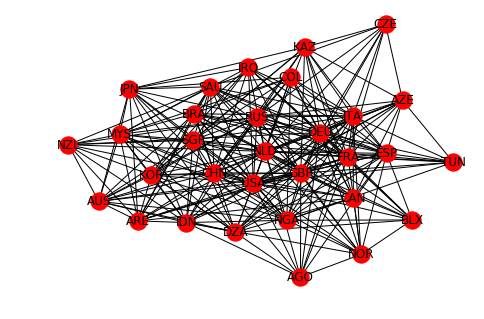

In [72]:
deg = nx.degree(h)
nodes = [n for n in nodes if deg[n] >= 9]
print(nodes)
k = h.subgraph(nodes)
nx.draw(k,with_labels=True)

In [66]:
g=nx.number_of_nodes(k)
print('g=',g)
L=nx.number_of_edges(k)
print('L=',L)

g= 31
L= 266


In [67]:
grado_promedio=L/g
print(grado_promedio)

8.580645161290322


In [68]:
L_p=g*(g-1)/2
print('L_p =', L_p)
rho=L/L_p
print('Densidad =',rho)

L_p = 465.0
Densidad = 0.5720430107526882


['KAZ', 'CZE', 'FRA', 'COL', 'ITA', 'NGA', 'AGO', 'DZA', 'BLX', 'NLD', 'AUS', 'IDN', 'IRQ', 'SGP', 'GBR', 'KOR', 'CAN', 'DEU', 'CHN', 'ARE', 'MYS', 'JPN', 'NZL', 'BRA', 'AZE', 'USA', 'RUS', 'ESP', 'NOR', 'TUN', 'SAU']


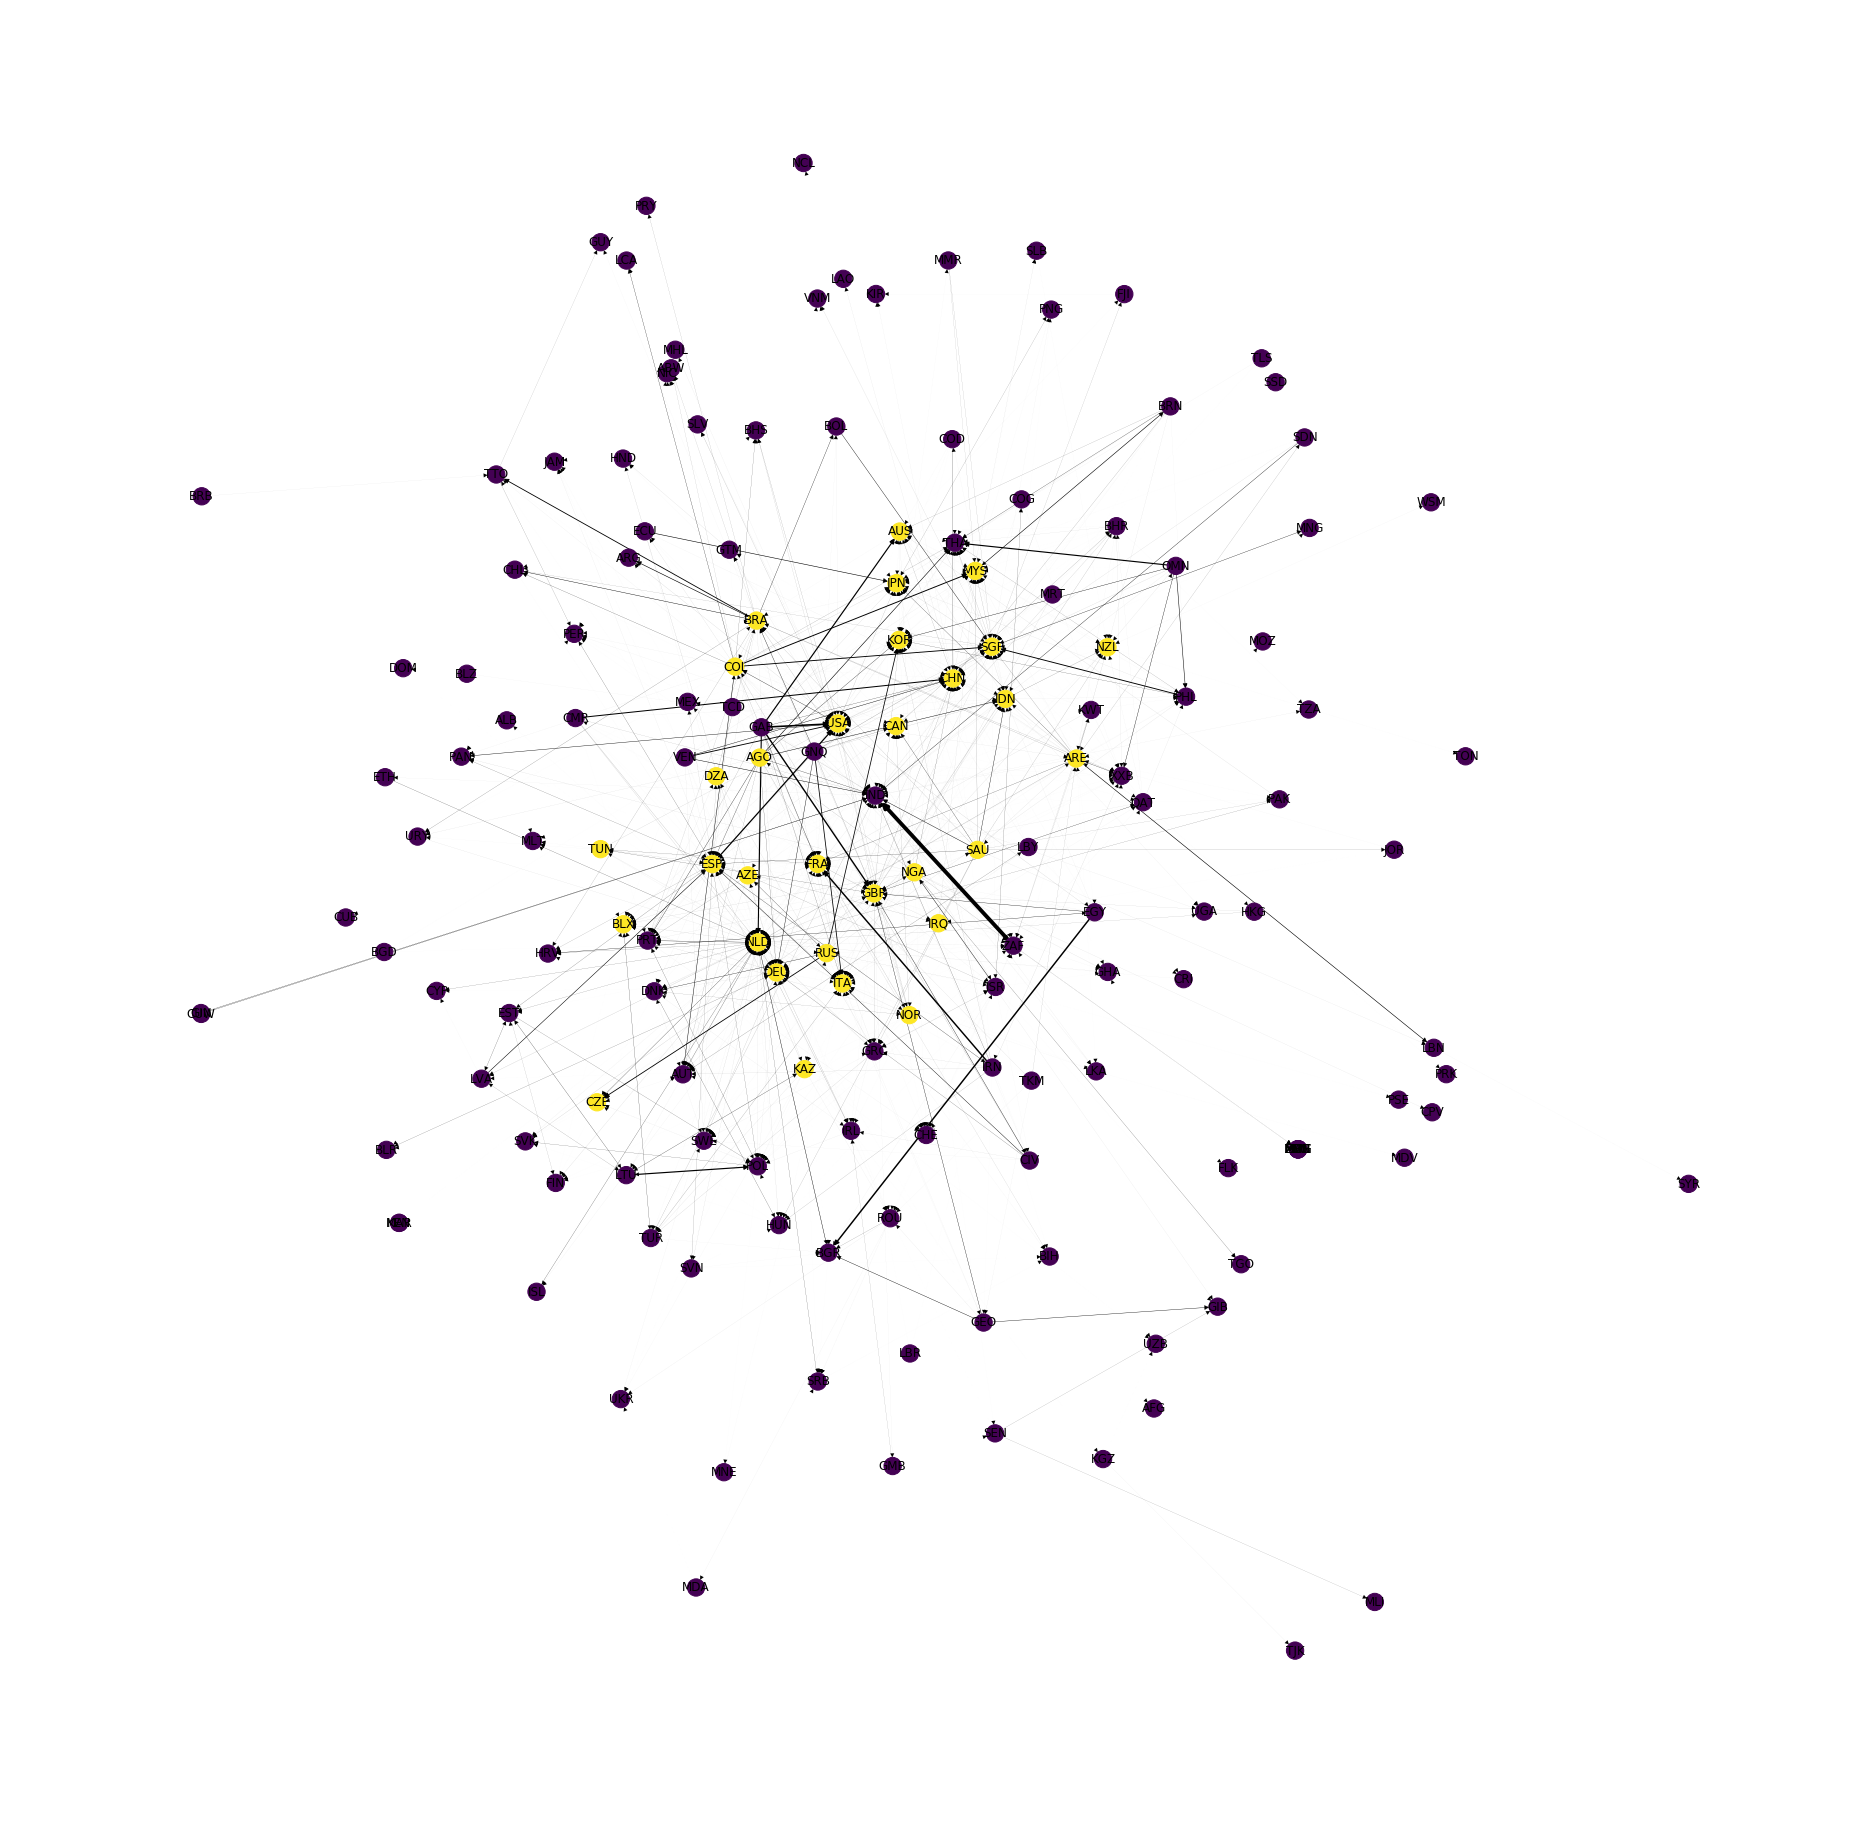

In [28]:
nodes=h.nodes
print(nodes)

val_map = {}
for i in nodes: 
    val_map[i]= 1.0
    
values = [val_map.get(node, 0.25) for node in G.nodes()]
    
  

plt.figure(3,figsize=(25,25)) 
nx.draw_kamada_kawai(G,width=weight,font_size=12, node_color=values,with_labels=True)
plt.show()


### Diametro del grafo 

In [73]:
nx.diameter(Gnd)

6